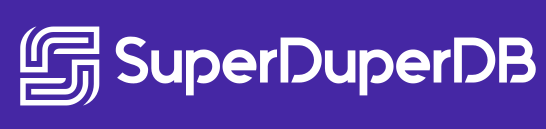


# Welcome to SuperDuperDB Playground!

## Download and setup the MongoDB instance

For demo purposes, the open-source version of mongodb is used.
~should take less than a minute


In [ ]:
!apt install wget curl gnupg2 software-properties-common apt-transport-https ca-certificates lsb-release
!curl -fsSL https://www.mongodb.org/static/pgp/server-6.0.asc| gpg --dearmor -o /etc/apt/trusted.gpg.d/mongodb-6.gpg
!echo "deb http://security.ubuntu.com/ubuntu focal-security main" | sudo tee /etc/apt/sources.list.d/focal-security.list
!sudo apt-get update
!sudo apt-get install libssl1.1
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu $(lsb_release -cs)/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list
!apt update
!apt install mongodb-org
!mkdir -p ./data/db
!nohup mongod --dbpath ./data/db > mongo.txt 2>&1 &
# Sleep for few seconds to let the instance start.
import time
time.sleep(5)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
lsb-release is already the newest version (11.1.0ubuntu4).
lsb-release set to manually installed.
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
curl is already the newest version (7.81.0-1ubuntu1.13).
software-properties-common is already the newest version (0.99.22.7).
gnupg2 is already the newest version (2.2.27-3ubuntu2.1).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,510 B of archives.
After this operation, 169 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 apt-transport-https all 2.4.9 [1,510 B]
Fetched 1,510 B in 0s (4,390 B/s)
Selecting previously unselected package apt-transport-https.
(Reading database ... 120493 files and directories current

# Once the instance has been started, grep for `mongo` in the processes list to confirm the availability.

In [ ]:
%%bash

ps -ef | grep mongo

root        1283    1280  0 16:47 ?        00:00:00 grep mongo


# Git clone the repository

In [ ]:
pat = input("Enter your PAT: ")
cmd = f"https://{pat}@github.com/thejumpman2323/superduperdb-stealth.git"

In [ ]:
!git clone $cmd

Cloning into 'superduperdb-stealth'...
remote: Enumerating objects: 8138, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 8138 (delta 104), reused 179 (delta 100), pack-reused 7921
Receiving objects: 100% (8138/8138), 57.38 MiB | 19.45 MiB/s, done.
Resolving deltas: 100% (4796/4796), done.


# Install requirments

In [ ]:
!pip install -U pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install --ignore-installed -r /content/superduperdb-stealth/requirements/requirements.txt

  Obtaining dependency information for accelerate==0.21.0 from https://files.pythonhosted.org/packages/70/f9/c381bcdd0c3829d723aa14eec8e75c6c377b4ca61ec68b8093d9f35fc7a7/accelerate-0.21.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:00
  Obtaining dependency information for anyio==3.7.1 from https://files.pythonhosted.org/packages/19/24/44299477fe7dcc9cb58d0a57d5a7588d6af2ff403fdd2d47a246c91a3246/anyio-3.7.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.8 MB/s eta 0:00:00
  Obtaining dependency information for boto3==1.28.5 from https://files.pythonhosted.org/packages/0a/5c/055aa43caaad7e75a481ec8f3d74435d6e248d8171ee14ea826f34eecbd4/boto3-1.28.5-py3-no

# Now lets quickly connect to the mongodb and make it superduper!!!

In [ ]:
import pymongo
import torch
import sys

sys.path.append('/content/superduperdb-stealth')

from superduperdb import superduper, CFG
from superduperdb import CFG
from superduperdb.datalayer.base.build import build_vector_database
from superduperdb.datalayer.base.datalayer import Datalayer
from superduperdb.datalayer.mongodb.artifacts import MongoArtifactStore
from superduperdb.datalayer.mongodb.data_backend import MongoDataBackend
from superduperdb.datalayer.mongodb.metadata import MongoMetaDataStore

db = pymongo.MongoClient().documents

db = Datalayer(
    databackend=MongoDataBackend(conn=db.client, name=db.name),
    metadata=MongoMetaDataStore(conn=db.client, name=db.name),
    artifact_store=MongoArtifactStore(
        conn=db.client, name=f'_filesystem:{db.name}'
    ),
    vector_database=build_vector_database(CFG.vector_search.type),
)

# Now lets add some cool data into our new database, whats better than a youtube transcript to get started with!

In [ ]:
!pip install datasets
from datasets import load_dataset

data = load_dataset('jamescalam/youtube-transcriptions', split='train')

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/74/a0/ec3868a14a0d0518e4559dd80b2f92259ddf58dbd39f27cf328ad294b22c/datasets-2.14.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/35/a8/36d8d7b3e46b377800d8dec47891cdf05842d1a2366909ae4a0c89fbc5e6/multiprocess-0.70.15-py310-none-any.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b77978ce611eb7a146a832/dill-0.3.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing install

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['title', 'published', 'url', 'video_id', 'channel_id', 'id', 'text', 'start', 'end'],
    num_rows: 208619
})

# A sample document from the corpus

In [ ]:
list_data = data.to_list()
list_data[0]

{'title': 'Training and Testing an Italian BERT - Transformers From Scratch #4',
 'published': '2021-07-06 13:00:03 UTC',
 'url': 'https://youtu.be/35Pdoyi6ZoQ',
 'video_id': '35Pdoyi6ZoQ',
 'channel_id': 'UCv83tO5cePwHMt1952IVVHw',
 'id': '35Pdoyi6ZoQ-t0.0',
 'text': 'Hi, welcome to the video.',
 'start': 0.0,
 'end': 9.36}

# Now lets add these documents into the database, We can see how easy it is by using the superduper instance.

In [ ]:
from superduperdb.core.document import Document as D
from superduperdb.datalayer.mongodb.query import Collection

import random

collection = Collection(name='youtube_transcript')
data = [D(x) for x in list_data[:100]]

random.shuffle(data)
db.execute(
    collection.insert_many(data)
)

(<pymongo.results.InsertManyResult at 0x78fb8cf3f040>,
 TaskWorkflow(database=<superduperdb.datalayer.base.datalayer.Datalayer object at 0x78fb8f906ec0>, G=<networkx.classes.digraph.DiGraph object at 0x78fb883db490>))

# We can query back our inserted data using a simple find api from superduper!

In [ ]:
list(db.execute(collection.find()))

[Document({'_id': ObjectId('64bee2bc71a162ab14fb080c'), 'title': 'Training and Testing an Italian BERT - Transformers From Scratch #4', 'published': '2021-07-06 13:00:03 UTC', 'url': 'https://youtu.be/35Pdoyi6ZoQ', 'video_id': '35Pdoyi6ZoQ', 'channel_id': 'UCv83tO5cePwHMt1952IVVHw', 'id': '35Pdoyi6ZoQ-t253.24', 'text': 'Max length here, 512.', 'start': 253.24, 'end': 259.96, '_fold': 'train'}),
 Document({'_id': ObjectId('64bee2bc71a162ab14fb080d'), 'title': 'Training and Testing an Italian BERT - Transformers From Scratch #4', 'published': '2021-07-06 13:00:03 UTC', 'url': 'https://youtu.be/35Pdoyi6ZoQ', 'video_id': '35Pdoyi6ZoQ', 'channel_id': 'UCv83tO5cePwHMt1952IVVHw', 'id': '35Pdoyi6ZoQ-t40.480000000000004', 'text': "So we've built our input data, our input pipeline.", 'start': 40.480000000000004, 'end': 51.519999999999996, '_fold': 'train'}),
 Document({'_id': ObjectId('64bee2bc71a162ab14fb080e'), 'title': 'Training and Testing an Italian BERT - Transformers From Scratch #4', 'pu

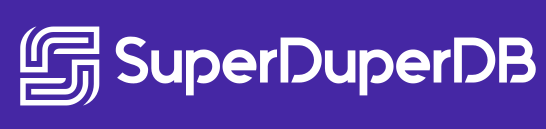

Now, We give you the control of ingenious creation known as ***SuperDuperDB***, ⏰ powerful technical product designed to engage and excite your curious mind. Take the reins and immerse yourself in its remarkable capabilities, for the next few hours are yours to revel in the boundless possibilities it offers. Delight in exploring its features, experimenting with its functionalities, and unlocking the true potential of this exceptional tool. May your time with ***SuperDuperDB*** be filled with joy, discovery, and the thrill of technical prowess as you embark on an unforgettable journey of learning and fun. Happy exploring!

In [ ]:
# left empty for you to start exploring!
# db.<?>